In [52]:
!pip install xgboost

In [53]:
import pandas as pd

# Read the data from the website and remove leading white spaces
adult_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None, skipinitialspace=True)


In [54]:
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "salary"
]

# Assign column names to the DataFrame
adult_df.columns = column_names


In [55]:
adult_df.drop(columns=['fnlwgt'], inplace=True)
adult_df['salary'].replace({'<=50K': 0, '>50K': 1}, inplace=True)
X = adult_df.drop(columns=['salary'])
y = adult_df['salary']


In [15]:
# Fitting RandomizedSearchCV to the data
random_search.fit(X_train, y_train)
best_estimator = random_search.best_estimator_

# Predicting on test data
y_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

# Calculating AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Printing results
print("Best Estimator:", best_estimator)
print("AUC Score:", auc_score)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END gamma=2.75, learning_rate=1.6, max_depth=1, n_estimators=700; total time=   1.2s
[CV] END gamma=2.75, learning_rate=1.6, max_depth=1, n_estimators=700; total time=   1.2s
[CV] END gamma=2.75, learning_rate=1.6, max_depth=1, n_estimators=700; total time=   1.1s
[CV] END gamma=2.75, learning_rate=1.6, max_depth=1, n_estimators=700; total time=   1.1s
[CV] END gamma=2.75, learning_rate=1.6, max_depth=1, n_estimators=700; total time=   1.1s
[CV] END gamma=0.25, learning_rate=0.7, max_depth=2, n_estimators=350; total time=   0.6s
[CV] END gamma=0.25, learning_rate=0.7, max_depth=2, n_estimators=350; total time=   0.7s
[CV] END gamma=0.25, learning_rate=0.7, max_depth=2, n_estimators=350; total time=   0.7s
[CV] END gamma=0.25, learning_rate=0.7, max_depth=2, n_estimators=350; total time=   0.7s
[CV] END gamma=0.25, learning_rate=0.7, max_depth=2, n_estimators=350; total time=   0.6s
[CV] END gamma=2.0, learning_rate=1.4

In [48]:
# Column names of the encoded features
encoded_columns = list(encoder.get_feature_names_out(input_features=categorical_columns))
# Concatenate the encoded feature names with the original column names
all_feature_names = list(X.drop(columns=categorical_columns).columns) + encoded_columns
# Geting feature importances with corresponding feature names
feature_importances = list(zip(all_feature_names, best_estimator.feature_importances_))
# Sorting feature importances
top_features = sorted(feature_importances, key=lambda x: x[1], reverse=True)[:5]
print("\nTop 5 Features:")
for feature in top_features:
    print(feature)
# (f) Using the model from part (b), predict for the train data
y_train_pred_proba = best_estimator.predict_proba(X_train)[:, 1]
train_auc_score = roc_auc_score(y_train, y_train_pred_proba)
print("\nAUC Score on Train Data:", train_auc_score)


Top 5 Features:
('marital_status_Married-civ-spouse', 0.519278)
('education_num', 0.13862115)
('education_Bachelors', 0.075242)
('occupation_Exec-managerial', 0.03153385)
('workclass_Self-emp-not-inc', 0.02911121)

AUC Score on Train Data: 0.9316360686555374


In [ ]:
##There is no significant overfitting .

#6. Moving into Conceptual Problems:

In [ ]:
#a) The Gini Index in Random Forest measures the impurity of a node by calculating the probability of misclassifying an instance based on the distribution of class labels. 
#During model training, it guides the selection of optimal splits at each node, aiming to maximize the reduction in impurity. By iteratively selecting splits that minimize 
#impurity, Random Forest builds an ensemble of decision trees that collectively produce robust predictions on unseen data, mitigating overfitting and enhancing generalization
#performance.


In [ ]:
#b) While both Random Forest and bagging utilize bootstrapping.Random Forest further introduces random feature selection at each split in the decision trees. 
#This randomness helps to decorrelate the individual trees, reducing their tendency to vote for the same output and thus decreasing the model's variance. 
#As a result, Random Forest often yields improved results compared to traditional -
#bagging techniques, as it enhances model diversity and generalization while maintaining the benefits of averaging multiple models.


In [ ]:
#c) The `max_depth` parameter in Random Forest determines the maximum depth of individual decision trees in the ensemble, thus directly influencing the model's-
# bias-variance tradeoff. A smaller `max_depth` tends to produce shallow trees with limited complexity, leading to higher bias but lower variance. 
#In contrast, a larger `max_depth` allows trees to capture more intricate patterns, potentially reducing bias but increasing variance. Finding the optimal `max_depth` involves -
#striking a balance between bias and variance to ensure the model generalizes well to unseen data without overfitting or underfitting. Cross-validation techniques can help 
#identify the `max_depth` value that minimizes the overall prediction error by effectively managing bias and variance.

In [ ]:
#d) The alpha parameter represents the weight of the individual classifiers in the final ensemble. It is calculated based on the classifier's accuracy in each iteration of 
#the boosting process. Classifiers with higher accuracy are assigned higher weights (alpha values), indicating their greater influence on the final prediction. 
#These alpha values are used to weight the contribution of each classifier when making predictions, with higher alpha values indicating greater confidence in the-
#classifier's predictions. 

In [ ]:
#e) #Each weak learner produces a prediction for the input data point.
#The contribution of each weak learner to the final prediction is weighted by its alpha value.
#The final predicted class is determined by summing up the weighted predictions from all weak learners.
#The class with the highest weighted sum is chosen as the final predicted class.

In [ ]:
#f) In Gradient Boosting, the `max_depth` parameter controls the maximum depth of each decision tree in the ensemble, influencing the complexity of the model.
#Deeper trees (larger `max_depth`) can capture complex relationships but are prone to overfitting, while shallower trees (smaller `max_depth`) are simpler but
#may fail to capture all nuances. It's important to tune the `max_depth` parameter to strike a balance between model complexity and generalization performance.
#Finding the optimal `max_depth` helps prevent overfitting by ensuring that the model learns meaningful patterns from the data without memorizing noise, ultimately 
#leading to improved predictive accuracy on unseen data.


In [ ]:
#g) In the provided top 5 predictors for each model, "education_num" appears in the top 5 predictors for both Random Forest and AdaBoost classifiers. 
##This predictor makes sense given the task of predicting income. Education level, often represented by the number of years of education (education_num),
#is a well-established factor influencing income levels. 
#Individuals with higher education levels tend to have better job opportunities and higher earning potential, which aligns with the goal of predicting income.

In [ ]:
#h) the XGBoost Classifier outperforms the other models. It achieves the highest AUC score of 0.9297, indicating superior overall predictive performance. 
#Additionally, while Random Forest, AdaBoost, and Gradient Boosting classifiers also achieve reasonable AUC scores, XGBoost stands out with its higher AUC score, -
#suggesting better discrimination between classes. 


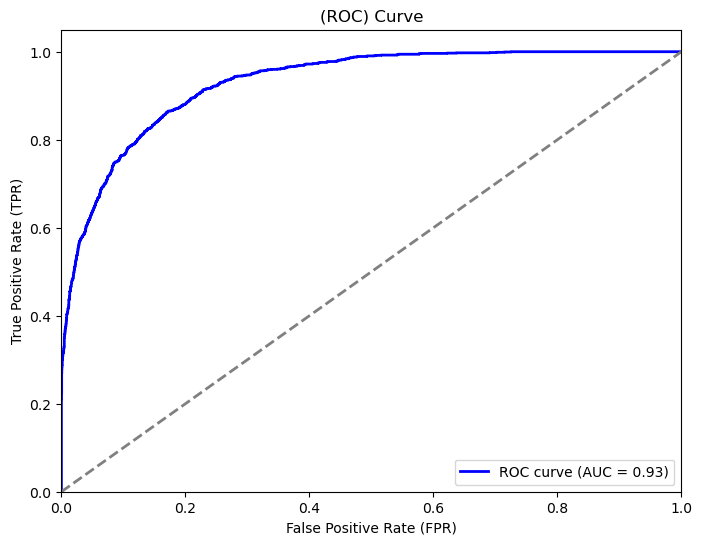

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_pred_proba = best_estimator.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('(ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#The ROC curve serves as a graphical representation of how well a classifier is performing. On the x-axis, we have the False Positive Rate (FPR), 
#which shows the proportion of negative instances mistakenly classified as positive. The y-axis represents the True Positive Rate (TPR), depicting 
#the ratio of correctly identified positive instances. Essentially, the ROC curve illustrates the trade-off between correctly identifying positives and 
#incorrectly flagging negatives. A classifier achieving a curve closer to the top-left corner signals superior performance, with high TPR and low FPR,
#indicating its effectiveness in distinguishing between positive and negative instances.
